### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA



# softmax regression

ar = pd.read_csv('audit_risk.csv')
tr = pd.read_csv('trial.csv')
# comapre column names 
ar_cols = ar.columns
tr_cols = tr.columns

ar.rename(columns={'Risk':'aRisk'}, inplace=True)
common_cols = ar_cols.intersection(tr_cols)
ar_not_tr = ar_cols.difference(tr_cols)
tr_not_ar = tr_cols.difference(ar_cols)

df = pd.concat([ar,tr[tr_not_ar]], axis=1)

df['Money_Value'].mean()
df.loc[642,'Money_Value'] = 14.14
dfx = df

# compare row values from ar and tr from columns with common names
dfx = dfx.reset_index(drop=True)
dfx_gpby = dfx.groupby(list(dfx.columns)) #group by
idx = [x[0] for x in dfx_gpby.groups.values() if len(x) == 1] #get index of unique records
diff_dfx = dfx.reindex(idx)

dfx['LOCATION_ID']= dfx['LOCATION_ID'].str.replace("LOHARU", "1001", case = False) 
dfx['LOCATION_ID']= dfx['LOCATION_ID'].str.replace("NUH", "1002", case = False) 
dfx['LOCATION_ID']= dfx['LOCATION_ID'].str.replace("SAFIDON", "1003", case = False)
dfx['LOCATION_ID'] = dfx['LOCATION_ID'].apply(pd.to_numeric)

y = dfx['History']
X = dfx.drop(['History'], axis = 1)

y.sum()/len(y)

#Standard Scaler used in Classification due to Binary Values of Risk

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train_org,x_test_org,y_train,y_test=train_test_split(X,y,random_state=0)  ## org stands for the very original
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train_org) 
X_test = scaler.transform(x_test_org) 

/Users/gabriel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Hard | Soft Voting

In [3]:
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('rnd', rnd_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (knn_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.9484536082474226
RandomForestClassifier 0.979381443298969
VotingClassifier 0.9484536082474226


/Users/gabriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [4]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9690721649484536
SVC 0.9690721649484536
VotingClassifier 0.9690721649484536


/Users/gabriel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging and Pasting

###### Running Decision Tree for Bagging

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [6]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9690721649484536


###### Bagging Score for Decision Tree = 0.9690721649484536

In [7]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.98
Test score: 0.97


###### Running Decision Tree for Pasting

In [8]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.9845360824742269


###### Pasting Score for Decision Tree = 0.9845360824742269

###### Running Random Forest for Bagging

In [9]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

np.sum(y_pred == y_pred_rf ) / len(y_pred)  # almost identical predictions

0.9896907216494846

In [10]:
print(accuracy_score(y_test, y_pred))

0.9948453608247423


###### Running Random Forest for Pasting

In [11]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [12]:
print(accuracy_score(y_test, y_pred_forest))

0.9845360824742269


In [13]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_forest))

0.9845360824742269


In [14]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.99


### Adaboosting

###### Adaboosting for Decision Tree 

In [15]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred_ada))

0.9845360824742269


 ###### Adaboosting for Random Forest

In [17]:
ada_frs = AdaBoostClassifier(RandomForestClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_frs.fit(X_train, y_train)
y_pred_frs = ada_frs.predict(X_test)

In [18]:
print(accuracy_score(y_test, y_pred_frs))

0.9690721649484536


### Gradient Boosting

In [19]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.990


In [20]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.0001)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.936
Accuracy on test set: 0.933


### PCA on Previous Models

In [21]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
# KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1, 5, 10, 15, 20] #can test multiple neighbors for the best result

train_score_list = []
test_score_list = []

for k in range(10,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_score_list.append(knn.score(X_train,y_train))
    test_score_list.append(knn.score(X_test,y_test))

print(train_score_list)
print(test_score_list)

[0.9707903780068728, 0.9725085910652921, 0.9707903780068728, 0.9725085910652921, 0.9725085910652921, 0.9725085910652921, 0.9707903780068728, 0.9707903780068728, 0.9690721649484536, 0.9690721649484536]
[0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226, 0.9484536082474226]


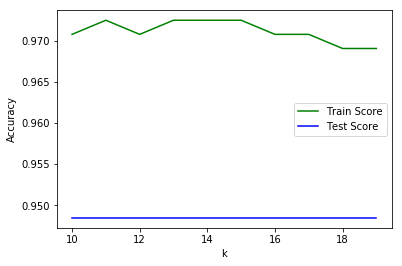

In [24]:
x_axis = range(10,20)
%matplotlib inline
plt.plot(x_axis, train_score_list, label = 'Train Score', c ='g')
plt.plot(x_axis, test_score_list, label = 'Test Score', c ='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#K = 14 is the best model due it's ability to imitate from the previous model

In [25]:
knn = KNeighborsClassifier(14)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

#Strong model due to the plateauing parameter score, K = 14

Train score: 0.9725
Train score: 0.9485


In [26]:
#Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression

clist = [0.001,0.01,0.1,1,10, 100]
train_score_list_l1 = []
test_score_list_l1 = []
train_score_list_l2 = []
test_score_list_l2 = []

for c in clist:
    log_l1 = LogisticRegression(penalty='l1', C=c )
    log_l2 = LogisticRegression(penalty='l2', C=c )
    log_l1.fit(X_train,y_train)
    log_l2.fit(X_train,y_train)
    train_score_list_l1.append(log_l1.score(X_train,y_train))
    train_score_list_l2.append(log_l2.score(X_train,y_train))
    test_score_list_l1.append(log_l1.score(X_test,y_test))
    test_score_list_l2.append(log_l2.score(X_test,y_test))
    
print(train_score_list_l1)
print(test_score_list_l1)
print(train_score_list_l2)
print(test_score_list_l2)


[0.936426116838488, 0.936426116838488, 0.9862542955326461, 0.9982817869415808, 1.0, 1.0]
[0.9329896907216495, 0.9329896907216495, 0.9690721649484536, 0.9845360824742269, 0.9845360824742269, 0.9845360824742269]
[0.9089347079037801, 0.9862542955326461, 0.9896907216494846, 0.993127147766323, 1.0, 1.0]
[0.9123711340206185, 0.9690721649484536, 0.9690721649484536, 0.9690721649484536, 0.9639175257731959, 0.9690721649484536]


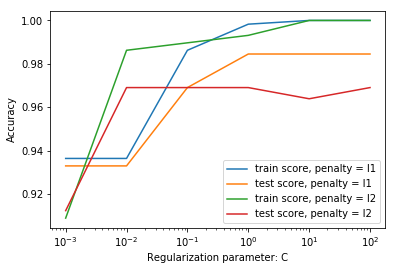

In [28]:
%matplotlib inline

plt.plot(clist, train_score_list_l1, label = 'train score, penalty = l1')
plt.plot(clist, test_score_list_l1, label = 'test score, penalty = l1')
plt.plot(clist, train_score_list_l2, label = 'train score, penalty = l2')
plt.plot(clist, test_score_list_l2, label = 'test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

#Graph below illustrates that 0.1 is the best hyperparameter 

In [29]:
# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#dtree.fit(X_train,y_train)
#print("Accuracy on Training set: {:.3f}".format(dtree.score(x_train_org,y_train)))
#print("Accuracy on Testing set: {:.3f}".format(dtree.score(x_test_org,y_test)))


dtree = DecisionTreeClassifier(max_depth = 4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on Training set: {:.3f}".format(dtree.score(x_train_org,y_train)))
print("Accuracy on Testing set: {:.3f}".format(dtree.score(x_test_org,y_test)))

#The accuracy of the Decision Tree model is really low so not the best
# model to choose

Accuracy on Training set: 0.048
Accuracy on Testing set: 0.036


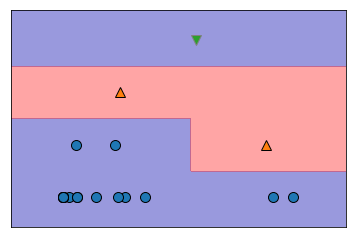

In [31]:
import mglearn 

X_b = X_train[:20,[2,22]] #inherited risk and location_id 
y_b = y_train[:20]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(dtree, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:,0], X_b[:,1], y_b)

# Model shows what the result of the model will be and which
# variables will lead to a 0 or 1 risk result

In [32]:
# Linear SVM

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)  ## org stands for the very original
linear_svm = LinearSVC().fit(X_train, y_train)
linear_svm.fit(X,y)
y_pred_forest = forest.predict(X_test)
print(accuracy_score(y_test, y_pred_forest))

0.9329896907216495


In [35]:
# SVC Kernel

In [40]:
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
y_pred_svm_linear = linear_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm_linear))

0.9432989690721649


In [41]:
print("Accuracy on Training set: {:.3f}".format(linear_svm.score(x_train_org,y_train)))
print("Accuracy on Testing set: {:.3f}".format(linear_svm.score(x_test_org,y_test)))


Accuracy on Training set: 0.995
Accuracy on Testing set: 0.943


In [38]:
# Poly kernel


In [42]:
svm_poly = SVC(kernel = 'poly')
svm_poly.fit(X_test, y_test)
y_pred_svm_kernel = svm_poly.predict(X_test)
print(accuracy_score(y_test, y_pred_svm_kernel))


1.0


In [43]:
print("Accuracy on Training set: {:.3f}".format(svm_poly.score(x_train_org,y_train)))
print("Accuracy on Testing set: {:.3f}".format(svm_poly.score(x_test_org,y_test)))


Accuracy on Training set: 0.940
Accuracy on Testing set: 1.000


### PCA Model Comparison

#### KNN Result:
##### Train score: 0.9622
##### Test score: 0.9639
    
#### PCA KNN Result:
##### Train score: 0.9725
##### Test score: 0.9485

#### Logit Result:
##### [0.5962199312714777, 0.8814432989690721, 0.9690721649484536, 0.9845360824742269, 0.9948453608247423, 0.9948453608247423]
##### [0.6391752577319587, 0.8917525773195877, 0.9742268041237113, 0.9896907216494846, 0.9948453608247423, 0.9948453608247423]
##### [0.9312714776632303, 0.9621993127147767, 0.9707903780068728, 0.979381443298969, 0.9862542955326461, 0.9948453608247423]
##### [0.9278350515463918, 0.9690721649484536, 0.9742268041237113, 0.9896907216494846, 0.9896907216494846, 0.9948453608247423]    
#### PCA Logit Result:
##### [0.936426116838488, 0.936426116838488, 0.9862542955326461, 0.9982817869415808, 1.0, 1.0]
##### [0.9329896907216495, 0.9329896907216495, 0.9690721649484536, 0.9845360824742269, 0.9845360824742269, 0.9845360824742269]
##### [0.9089347079037801, 0.9862542955326461, 0.9896907216494846, 0.993127147766323, 1.0, 1.0]
##### [0.9123711340206185, 0.9690721649484536, 0.9690721649484536, 0.9690721649484536, 0.9639175257731959, 0.9690721649484536]

#### Decision Tree:
##### Accuracy on Training set: 0.404
##### Accuracy on Testing set: 0.361
##### PCA Decision Tree Result:
##### Accuracy on Training set: 0.048
##### Accuracy on Testing set: 0.036

#### Linear SVM: 
##### Accuracy on Training set: 0.404
##### Accuracy on Testing set: 0.376
##### Accuracy Score Prediction: 0.9432989690721649


#### PCA Linear SVM:
##### Accuracy on Training set: 0.995
##### Accuracy on Testing set: 0.943
##### Accuracy Score Prediction: 1.0

#### Poly SVM:
##### Accuracy on Training set: 0.404
##### Accuracy on Testing set: 0.361
##### Accuracy Score Prediction: 0.8814432989690721   
    
#### PCA Poly SVM:
##### Accuracy on Training set: 0.940
##### Accuracy on Testing set: 1.000
##### Accuracy Score Prediction: 1.0
    

#### PCA Conclusion: Overall, PCA improved the accuracy of the Linear and Polynomial Support Vector Machine, the Logistic Classificaiton, and KNN. The Decision Tree accuracy was the only model that had decrased in accuracy

### Neurel Network - Classification

In [123]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

x_train_org,x_test_org,y_train,y_test=train_test_split(X,y,random_state=0)  ## org stands for the very original
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train_org) 
X_test = scaler.transform(x_test_org) 

In [129]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [130]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
582/582 [==============================] - 1s 1ms/step - loss: 0.6702 - acc: 0.6100
Epoch 2/150
582/582 [==============================] - 0s 284us/step - loss: 0.6365 - acc: 0.8351
Epoch 3/150
582/582 [==============================] - 0s 239us/step - loss: 0.6043 - acc: 0.8127
Epoch 4/150
582/582 [==============================] - 0s 215us/step - loss: 0.5633 - acc: 0.8162
Epoch 5/150
582/582 [==============================] - 0s 204us/step - loss: 0.5083 - acc: 0.8265
Epoch 6/150
582/582 [==============================] - 0s 206us/step - loss: 0.4497 - acc: 0.8419
Epoch 7/150
582/582 [==============================] - 0s 205us/step - loss: 0.4038 - acc: 0.8436
Epoch 8/150
582/582 [==============================] - 0s 219us/step - loss: 0.3692 - acc: 0.8454
Epoch 9/150
582/582 [==============================] - 0s 256us/step - loss: 0.3445 - acc: 0.8557
Epoch 10/150
582/582 [==============================] - 0s 250us/step - loss: 0.3252 - acc: 0.8643
Epoch 11/150
582/582 

582/582 [==============================] - 0s 201us/step - loss: 0.1644 - acc: 0.9313
Epoch 84/150
582/582 [==============================] - 0s 218us/step - loss: 0.1594 - acc: 0.9364
Epoch 85/150
582/582 [==============================] - 0s 200us/step - loss: 0.1671 - acc: 0.9296
Epoch 86/150
582/582 [==============================] - 0s 228us/step - loss: 0.1625 - acc: 0.9433
Epoch 87/150
582/582 [==============================] - 0s 300us/step - loss: 0.1610 - acc: 0.9313
Epoch 88/150
582/582 [==============================] - 0s 252us/step - loss: 0.1596 - acc: 0.9330
Epoch 89/150
582/582 [==============================] - 0s 237us/step - loss: 0.1585 - acc: 0.9313 0s - loss: 0.2009 - acc: 0.91
Epoch 90/150
582/582 [==============================] - 0s 220us/step - loss: 0.1593 - acc: 0.9313
Epoch 91/150
582/582 [==============================] - 0s 237us/step - loss: 0.1588 - acc: 0.9278
Epoch 92/150
582/582 [==============================] - 0s 206us/step - loss: 0.1587 - acc: 

In [132]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

194/194 [==============================] - 0s 847us/step

acc: 93.30%


In [133]:
y_predict = model.predict(X_test)
y_predict

array([[1.        ],
       [1.        ],
       [0.0056498 ],
       [0.00793771],
       [0.99999416],
       [0.01857417],
       [0.01399356],
       [0.07592128],
       [0.00845857],
       [0.07696842],
       [1.        ],
       [1.        ],
       [0.00600959],
       [0.04905406],
       [1.        ],
       [0.03300349],
       [0.03260681],
       [0.9970415 ],
       [0.9999764 ],
       [0.22660244],
       [0.02480831],
       [0.18802428],
       [0.00600567],
       [0.00783223],
       [1.        ],
       [0.03560997],
       [1.        ],
       [0.01732446],
       [0.6364301 ],
       [0.09566218],
       [0.0056735 ],
       [0.03431503],
       [0.06661424],
       [1.        ],
       [0.2933437 ],
       [0.00797415],
       [0.03627653],
       [0.01662322],
       [0.08420402],
       [1.        ],
       [0.07267378],
       [1.        ],
       [0.9243253 ],
       [0.98251396],
       [1.        ],
       [0.01083868],
       [0.0264571 ],
       [0.995